<a href="https://colab.research.google.com/github/kip-07/Maze_Solver/blob/main/1_MazeSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque



In [6]:
# Define your maze structure here
maze_structure = [
    ['S', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
    ['.', '#', '.', '#', '#', '#', '#', '#', '#', '.'],
    ['.', '#', '.', '.', '.', '.', '.', '.', '#', '.'],
    ['.', '#', '#', '#', '#', '#', '#', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '#', '.', '#', '.'],
    ['.', '#', '#', '#', '#', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '.', '#', '.', '.', '.', '#', '.'],
    ['#', '#', '#', '#', '#', '#', '#', '#', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'E'],
]

# Convert the maze structure to a NumPy array
maze = np.array(maze_structure)


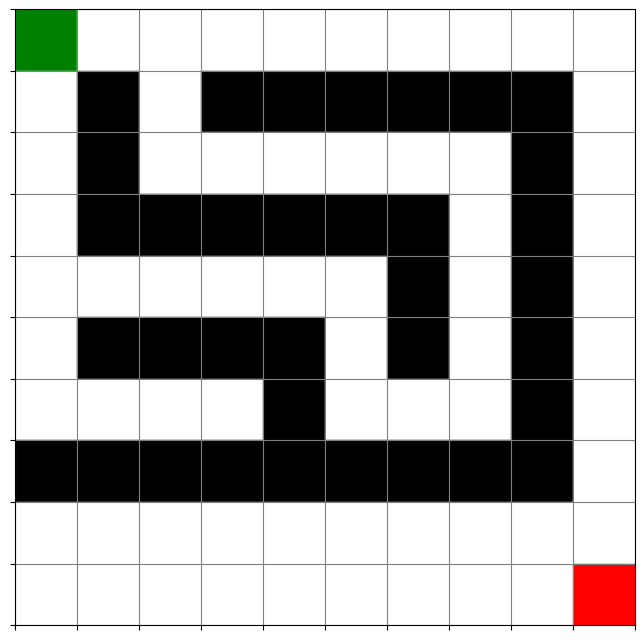

In [7]:
#it is same as maze visualization
def display_grid(maze, explored=None, path=None):
    color_map = {
        '#': 'black',  # Wall
        '.': 'white',  # Open path
        'S': 'green',  # Start
        'E': 'red'     # End
    }
    rows, cols = maze.shape
    fig, ax = plt.subplots(figsize=(8, 8)) #creates matplotlib figure and set size


# Create grid
    for r in range(rows):
        for c in range(cols):
            color = color_map[maze[r, c]]
            ax.add_patch(plt.Rectangle((c, r), 1, 1, color=color))

    # Highlight explored nodes
    if explored:
        for r, c in explored:
            ax.add_patch(plt.Rectangle((c, r), 1, 1, color='lightblue', alpha=0.6)) #draws lightblue rectangle with transparency 0.6

    # Highlight final path
    if path:
        for r, c in path:
            ax.add_patch(plt.Rectangle((c, r), 1, 1, color='yellow', alpha=0.6))

    # Adjust the grid and axes
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(np.arange(0, cols+1, 1)) #to ensure alignment b\w grid lines and maze cells
    ax.set_yticks(np.arange(0, rows+1, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='gray')
    plt.gca().invert_yaxis()#by default origin(0,0)so to make topleft corner the origin
    plt.show()

# Example Maze

display_grid(maze)


In [8]:
def bfs_with_visualization(maze):
    rows, cols = maze.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]#right,down,left,up
    start, end = (0, 0), (rows - 1, cols - 1)
    queue = deque([start])
    visited = set()
    visited.add(start)
    parent = {start: None}#cell from which the current cell was reached
    explored = []

    while queue:
        r, c = queue.popleft()#removes first element from left(FIFO)
        explored.append((r, c))

        if (r, c) == end:
            path = [] #empty list path store coordinates from S to E
            curr = end  # trace back the path from E
            while curr:  # curr is not None or (None, None)
                path.append(curr)
                curr = parent.get(curr)  # Get parent of current node
            return path[::-1], explored  # Reverse path for start to end

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] != '#' and (nr, nc) not in visited:
              #checks if neighboring cell is valid and should be explored
                queue.append((nr, nc))
                visited.add((nr, nc))
                parent[(nr, nc)] = (r, c)

    return None, explored  # Return None if no path is found


In [9]:
def dfs_with_visualization(maze):
    rows, cols = maze.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start, end = (0, 0), (rows-1, cols-1)
    stack = [(start, [start])]
    visited = set()
    explored = []

    while stack:
        (r, c), path = stack.pop()
        explored.append((r, c))
        visited.add((r, c))

        if (r, c) == end: #checks for end node
            return path, explored

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] != '#' and (nr, nc) not in visited:
                stack.append(((nr, nc), path + [(nr, nc)]))

    return None, explored



--- BFS Results ---
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Nodes Explored: [(0, 0), (0, 1), (1, 0), (0, 2), (2, 0), (0, 3), (1, 2), (3, 0), (0, 4), (2, 2), (4, 0), (0, 5), (2, 3), (4, 1), (5, 0), (0, 6), (2, 4), (4, 2), (6, 0), (0, 7), (2, 5), (4, 3), (6, 1), (0, 8), (2, 6), (4, 4), (6, 2), (0, 9), (2, 7), (4, 5), (6, 3), (1, 9), (3, 7), (5, 5), (2, 9), (4, 7), (6, 5), (3, 9), (5, 7), (6, 6), (4, 9), (6, 7), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Execution Time: 0.0009 seconds


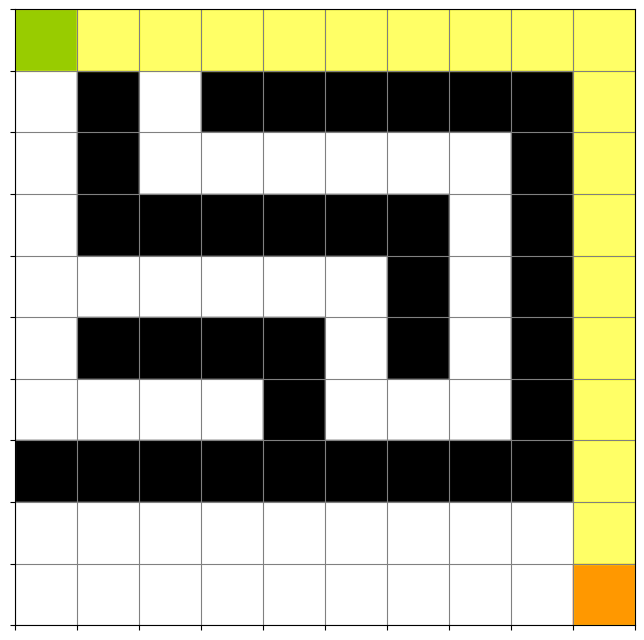


--- DFS Results ---
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
Nodes Explored: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (1, 2), (0, 2), (0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9,

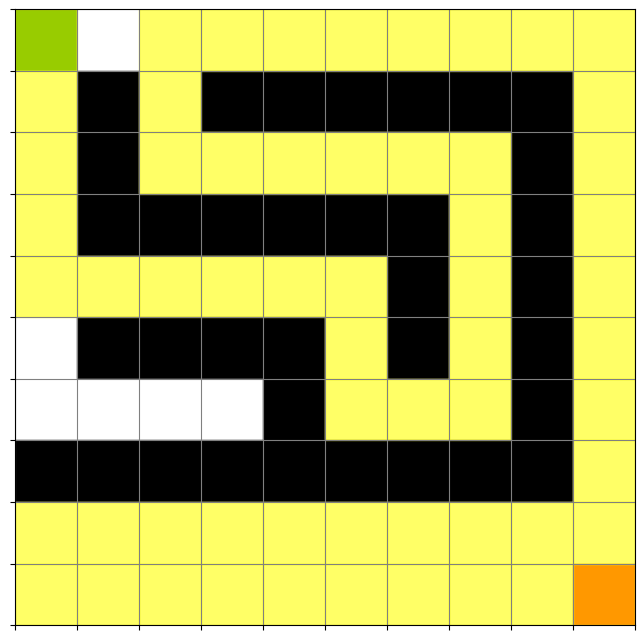


--- Comparison ---
Time Taken (BFS vs DFS): 0.0009 vs 0.0005
Nodes Explored (BFS vs DFS): [(0, 0), (0, 1), (1, 0), (0, 2), (2, 0), (0, 3), (1, 2), (3, 0), (0, 4), (2, 2), (4, 0), (0, 5), (2, 3), (4, 1), (5, 0), (0, 6), (2, 4), (4, 2), (6, 0), (0, 7), (2, 5), (4, 3), (6, 1), (0, 8), (2, 6), (4, 4), (6, 2), (0, 9), (2, 7), (4, 5), (6, 3), (1, 9), (3, 7), (5, 5), (2, 9), (4, 7), (6, 5), (3, 9), (5, 7), (6, 6), (4, 9), (6, 7), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)] vs [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (1, 2), (0, 2), (0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8), (8, 7), (8, 6), (8, 5), (8, 4), (8, 3), (8, 2), (8, 1), (8, 0), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
Path Opt

In [10]:
import time

start_time = time.time()
bfs_path, bfs_nodes = bfs_with_visualization(maze)
bfs_time = time.time() - start_time

# Run DFS
start_time = time.time()
dfs_path, dfs_nodes = dfs_with_visualization(maze)
dfs_time = time.time() - start_time

# Visualization and Comparison
print("\n--- BFS Results ---")
if bfs_path:
    print(f"Path: {bfs_path}")
    print(f"Nodes Explored: {bfs_nodes}")
    print(f"Execution Time: {bfs_time:.4f} seconds")
    display_grid(maze, 0, bfs_path)
else:
    print("No path found with BFS.")

print("\n--- DFS Results ---")
if dfs_path:
    print(f"Path: {dfs_path}")
    print(f"Nodes Explored: {dfs_nodes}")
    print(f"Execution Time: {dfs_time:.4f} seconds")
    display_grid(maze, 0, dfs_path)
else:
    print("No path found with DFS.")

# Compare Metrics
print("\n--- Comparison ---")
print(f"Time Taken (BFS vs DFS): {bfs_time:.4f} vs {dfs_time:.4f}")
print(f"Nodes Explored (BFS vs DFS): {bfs_nodes} vs {dfs_nodes}")
print("Path Optimality:")
if bfs_path and dfs_path:
    print(f"Path Length (BFS vs DFS): {len(bfs_path)} vs {len(dfs_path)}")
    print("BFS is optimal for shortest path.")

# Measure BFS Performance
start_time = time.time()
bfs_path, bfs_explored = bfs_with_visualization(maze)
bfs_time = time.time() - start_time

# Measure DFS Performance
start_time = time.time()
dfs_path, dfs_explored = dfs_with_visualization(maze)
dfs_time = time.time() - start_time

# Display Metrics
print("\nPerformance Metrics:")
print(f"BFS - Time: {bfs_time:.4f}s, Nodes Explored: {len(bfs_explored)}")
print(f"DFS - Time: {dfs_time:.4f}s, Nodes Explored: {len(dfs_explored)}")


In [11]:
def bidirectional_bfs(maze):
    rows, cols = len(maze), len(maze[0])
    start, end = (0, 0), (rows - 1, cols - 1)
    queue_start = Queue()
    queue_end = Queue()
    queue_start.put((start, [start]))
    queue_end.put((end, [end]))

    visited_start = {start: [start]}
    visited_end = {end: [end]}

    while not queue_start.empty() and not queue_end.empty():
        # Forward Search
        current_start, path_start = queue_start.get()
        row, col = current_start
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols and maze[r][c] == '.' and (r, c) not in visited_start:
                new_path = path_start + [(r, c)]
                visited_start[(r, c)] = new_path
                queue_start.put(((r, c), new_path))
                if (r, c) in visited_end:
                    return new_path + visited_end[(r, c)][::-1], len(visited_start) + len(visited_end)

        # Backward Search
        current_end, path_end = queue_end.get()
        row, col = current_end
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols and maze[r][c] == '.' and (r, c) not in visited_end:
                new_path = path_end + [(r, c)]
                visited_end[(r, c)] = new_path
                queue_end.put(((r, c), new_path))
                if (r, c) in visited_start:
                    return visited_start[(r, c)] + new_path[::-1], len(visited_start) + len(visited_end)

    return None, len(visited_start) + len(visited_end)


In [12]:
def bidirectional_dfs(maze):
    rows, cols = len(maze), len(maze[0])
    start, end = (0, 0), (rows - 1, cols - 1)
    stack_start = [(start, [start])]
    stack_end = [(end, [end])]

    visited_start = {start: [start]}
    visited_end = {end: [end]}

    while stack_start and stack_end:
        # Forward Search
        current_start, path_start = stack_start.pop()
        row, col = current_start
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols and maze[r][c] == '.' and (r, c) not in visited_start:
                new_path = path_start + [(r, c)]
                visited_start[(r, c)] = new_path
                stack_start.append(((r, c), new_path))
                if (r, c) in visited_end:
                    return new_path + visited_end[(r, c)][::-1], len(visited_start) + len(visited_end)

        # Backward Search
        current_end, path_end = stack_end.pop()
        row, col = current_end
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < rows and 0 <= c < cols and maze[r][c] == '.' and (r, c) not in visited_end:
                new_path = path_end + [(r, c)]
                visited_end[(r, c)] = new_path
                stack_end.append(((r, c), new_path))
                if (r, c) in visited_start:
                    return visited_start[(r, c)] + new_path[::-1], len(visited_start) + len(visited_end)

    return None, len(visited_start) + len(visited_end)


Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Nodes Explored: 57
Execution Time: 0.0011 seconds


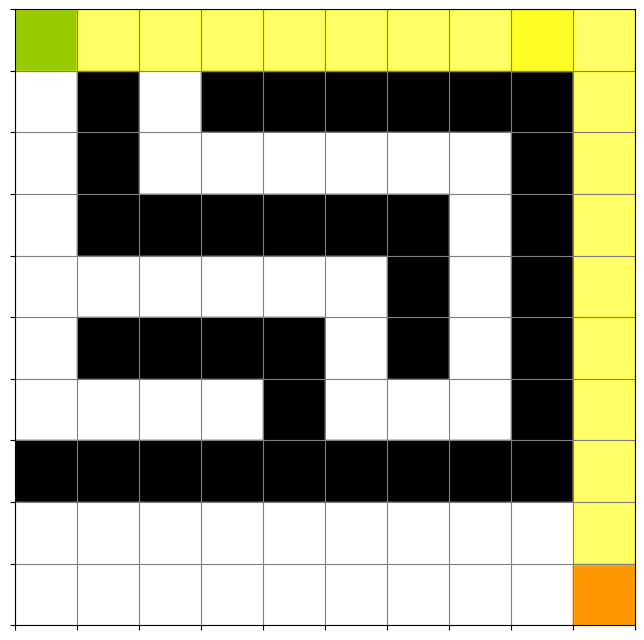

Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 9), (9, 9)]
Nodes Explored: 40
Execution Time: 0.0004 seconds


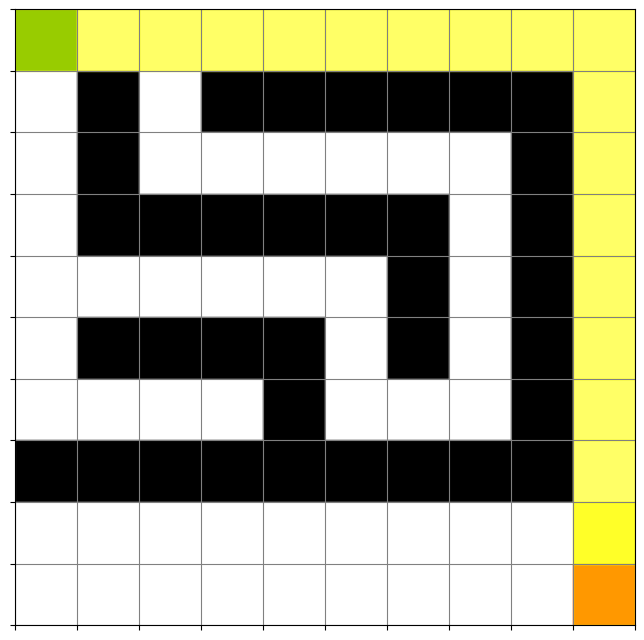

In [13]:
import time
from queue import Queue
# Run Bi-Directional BFS
start_time = time.time()
start = (0,0)
rows, cols = maze.shape
end = (rows-1 , cols-1)
bidirectional_bfs_path, bidirectional_bfs_nodes = bidirectional_bfs(maze)
bidirectional_bfs_time = time.time() - start_time

# Run Bi-Directional DFS
start_time = time.time()
bidirectional_dfs_path, bidirectional_dfs_nodes = bidirectional_dfs(maze)
bidirectional_dfs_time = time.time() - start_time

if bidirectional_bfs_path:
    print(f"Path: {bidirectional_bfs_path}")
    print(f"Nodes Explored: {bidirectional_bfs_nodes}")
    print(f"Execution Time: {bidirectional_bfs_time:.4f} seconds")
    display_grid(maze,0 , bidirectional_bfs_path)
else:
    print("No path found with Bi-Directional BFS.")

if bidirectional_dfs_path:
    print(f"Path: {bidirectional_dfs_path}")
    print(f"Nodes Explored: {bidirectional_dfs_nodes}")
    print(f"Execution Time: {bidirectional_dfs_time:.4f} seconds")
    display_grid(maze,0 , bidirectional_dfs_path)
else:
    print("No path found with Bi-Directional DFS.")
